In [1]:
import sklearn
import scipy
import pycaret
import botorch
import torch
import gpytorch
import pandas as pd

c:\Users\99823827\Anaconda3\envs\Dissertacao_nightly\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\99823827\Anaconda3\envs\Dissertacao_nightly\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\99823827\Anaconda3\envs\Dissertacao_nightly\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
c:\Users\99823827\Anaconda3\envs\Dissertacao_nightly\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
df=pd.read_csv("..\data_gen\data_to_modeling_v0.csv",sep='\t',dtype='float',index_col=0)
df

,depth,vc,rake_angle,clearance_angle,expected_cut_force,A,B,C,n,m,d1,d2,d3,d4,d5,densidade,young_modulus,poisson_coef
0.0,0.5,3000.0,-10.0,5.0,6063.298535,553.0,600.0,0.0134,0.234,1.0,0.06,3.31,-1.96,0.0018,0.58,2.700000e-09,210000.0,0.269
1.0,0.5,3000.0,-7.0,5.0,4420.143506,553.0,600.0,0.0134,0.234,1.0,0.06,3.31,-1.96,0.0018,0.58,2.700000e-09,210000.0,0.269
2.0,0.5,3000.0,-4.0,5.0,5492.385645,553.0,600.0,0.0134,0.234,1.0,0.06,3.31,-1.96,0.0018,0.58,2.700000e-09,210000.0,0.269
3.0,0.5,3000.0,-1.0,5.0,4820.064746,553.0,600.0,0.0134,0.234,1.0,0.06,3.31,-1.96,0.0018,0.58,2.700000e-09,210000.0,0.269
4.0,0.5,3000.0,2.0,5.0,3987.947656,553.0,600.0,0.0134,0.234,1.0,0.06,3.31,-1.96,0.0018,0.58,2.700000e-09,210000.0,0.269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283.0,0.5,4500.0,2.0,5.0,4818.066699,553.0,600.0,0.0134,0.234,1.0,0.06,3.31,-1.96,0.0018,0.58,2.700000e-09,210000.0,0.269
284.0,0.5,4500.0,5.0,5.0,3898.750684,553.0,600.0,0.0134,0.234,1.0,0.06,3.31,-1.96,0.0018,0.58,2.700000e-09,210000.0,0.269
285.0,0.5,4500.0,8.0,5.0,5058.776172,553.0,600.0,0.0134,0.234,1.0,0.06,3.31,-1.96,0.0018,0.58,2.700000e-09,210000.0,0.269
286.0,0.5,4500.0,11.0,5.0,5383.911328,553.0,600.0,0.0134,0.234,1.0,0.06,3.31,-1.96,0.0018,0.58,2.700000e-09,210000.0,0.269


In [3]:
ignore_features=["depth","clearance_angle",
"d1","d2","d3","d4","d5","densidade",] #devido a erro no pycaret, vou fazer exclusão forçada das variáveis
df_1=df.drop(ignore_features,axis=1)

In [4]:
df_1.isna().any()

vc                    False
rake_angle            False
expected_cut_force    False
A                     False
B                     False
C                     False
n                     False
m                     False
young_modulus         False
poisson_coef          False
dtype: bool

In [5]:
df

,depth,vc,rake_angle,clearance_angle,expected_cut_force,A,B,C,n,m,d1,d2,d3,d4,d5,densidade,young_modulus,poisson_coef
0.0,0.5,3000.0,-10.0,5.0,6063.298535,553.0,600.0,0.0134,0.234,1.0,0.06,3.31,-1.96,0.0018,0.58,2.700000e-09,210000.0,0.269
1.0,0.5,3000.0,-7.0,5.0,4420.143506,553.0,600.0,0.0134,0.234,1.0,0.06,3.31,-1.96,0.0018,0.58,2.700000e-09,210000.0,0.269
2.0,0.5,3000.0,-4.0,5.0,5492.385645,553.0,600.0,0.0134,0.234,1.0,0.06,3.31,-1.96,0.0018,0.58,2.700000e-09,210000.0,0.269
3.0,0.5,3000.0,-1.0,5.0,4820.064746,553.0,600.0,0.0134,0.234,1.0,0.06,3.31,-1.96,0.0018,0.58,2.700000e-09,210000.0,0.269
4.0,0.5,3000.0,2.0,5.0,3987.947656,553.0,600.0,0.0134,0.234,1.0,0.06,3.31,-1.96,0.0018,0.58,2.700000e-09,210000.0,0.269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283.0,0.5,4500.0,2.0,5.0,4818.066699,553.0,600.0,0.0134,0.234,1.0,0.06,3.31,-1.96,0.0018,0.58,2.700000e-09,210000.0,0.269
284.0,0.5,4500.0,5.0,5.0,3898.750684,553.0,600.0,0.0134,0.234,1.0,0.06,3.31,-1.96,0.0018,0.58,2.700000e-09,210000.0,0.269
285.0,0.5,4500.0,8.0,5.0,5058.776172,553.0,600.0,0.0134,0.234,1.0,0.06,3.31,-1.96,0.0018,0.58,2.700000e-09,210000.0,0.269
286.0,0.5,4500.0,11.0,5.0,5383.911328,553.0,600.0,0.0134,0.234,1.0,0.06,3.31,-1.96,0.0018,0.58,2.700000e-09,210000.0,0.269


# Configurando diferentes setups


|Setup|polynomial_features|normalize|pca|transform_target|remove_multicollinearity|feature_selection|n_features_to_select|
|-|-|-|-|-|-|-|-|
|1|False|False|False|False|True|False|-|
|2|True|True|False|False|True|False|-|
|3|True|True|True|False|True|True|5|
|4|True|True|False|True|True|True|10|
|5|True|True|True|True|True|True|10|

In [6]:
from pycaret.regression import *


setup_1 = setup(df_1,
          target = 'expected_cut_force',
          fold_shuffle=True,
          numeric_features=list(df_1.drop("expected_cut_force",axis=1).columns),
          imputation_type=None,
          polynomial_features=True,
          profile=False,
          normalize=False,
          
          pca=False,
          pca_method="linear", #kernel,

          transform_target=False,
          transform_target_method="yeo-johnson",
          
          remove_multicollinearity=True,
          low_variance_threshold=0.01,

          feature_selection=False,
          feature_selection_method="univariate",
          n_features_to_select=6
)

setup_2 = setup(df_1,
          target = 'expected_cut_force',
          fold_shuffle=True,
          numeric_features=list(df_1.drop("expected_cut_force",axis=1).columns),
          imputation_type=None,
          polynomial_features=True,
          profile=False,
          normalize=True,
          
          pca=False,
          pca_method="linear", #kernel,

          transform_target=False,
          transform_target_method="yeo-johnson",
          
          remove_multicollinearity=True,
          low_variance_threshold=0.01,

          feature_selection=False,
          feature_selection_method="univariate",
          n_features_to_select=6
)

setup_3 = setup(df_1,
          target = 'expected_cut_force',
          fold_shuffle=True,
          numeric_features=list(df_1.drop("expected_cut_force",axis=1).columns),
          imputation_type=None,
          polynomial_features=True,
          normalize=True,
          
          pca=True,
          pca_method="linear", #kernel,

          transform_target=False,
          transform_target_method="yeo-johnson",
          
          remove_multicollinearity=True,
          low_variance_threshold=0.01,

          feature_selection=True,
          feature_selection_method="univariate",
          n_features_to_select=5
)

setup_4 = setup(df_1,
          target = 'expected_cut_force',
          fold_shuffle=True,
          numeric_features=list(df_1.drop("expected_cut_force",axis=1).columns),
          imputation_type=None,
          polynomial_features=True,
          normalize=True,
          
          pca=False,
          pca_method="linear", #kernel,

          transform_target=True,
          transform_target_method="yeo-johnson",
          
          remove_multicollinearity=True,
          low_variance_threshold=0.01,

          feature_selection=True,
          feature_selection_method="univariate",
          n_features_to_select=5
)

setup_5 = setup(df_1,
          target = 'expected_cut_force',
          fold_shuffle=True,
          numeric_features=list(df_1.drop("expected_cut_force",axis=1).columns),
          imputation_type=None,
          polynomial_features=True,
          normalize=True,
          
          pca=True,
          pca_method="linear", #kernel,

          transform_target=True,
          transform_target_method="yeo-johnson",
          
          remove_multicollinearity=True,
          low_variance_threshold=0.01,

          feature_selection=True,
          feature_selection_method="univariate",
          n_features_to_select=5
)

,Description,Value
0,Session id,5369
1,Target,expected_cut_force
2,Target type,Regression
3,Original data shape,"(288, 10)"
4,Transformed data shape,"(288, 14)"
5,Transformed train set shape,"(201, 14)"
6,Transformed test set shape,"(87, 14)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,None


,Description,Value
0,Session id,6877
1,Target,expected_cut_force
2,Target type,Regression
3,Original data shape,"(288, 10)"
4,Transformed data shape,"(288, 14)"
5,Transformed train set shape,"(201, 14)"
6,Transformed test set shape,"(87, 14)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,None


,Description,Value
0,Session id,3107
1,Target,expected_cut_force
2,Target type,Regression
3,Original data shape,"(288, 10)"
4,Transformed data shape,"(288, 6)"
5,Transformed train set shape,"(201, 6)"
6,Transformed test set shape,"(87, 6)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,None


,Description,Value
0,Session id,5096
1,Target,expected_cut_force
2,Target type,Regression
3,Original data shape,"(288, 10)"
4,Transformed data shape,"(288, 6)"
5,Transformed train set shape,"(201, 6)"
6,Transformed test set shape,"(87, 6)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,None


,Description,Value
0,Session id,621
1,Target,expected_cut_force
2,Target type,Regression
3,Original data shape,"(288, 10)"
4,Transformed data shape,"(288, 6)"
5,Transformed train set shape,"(201, 6)"
6,Transformed test set shape,"(87, 6)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,None


# Modelagem com expansão nas features

In [7]:
setup_1.compare_models()
setup_2.compare_models()
setup_3.compare_models()
setup_4.compare_models()
setup_5.compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,14:24:47
Status,. . . . . . . . . . . . . . . . . .,Loading Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,287.5283,189035.8007,418.0309,0.9263,0.0940,0.0704,0.0840
gbr,Gradient Boosting Regressor,302.9626,207651.9367,438.1102,0.9192,0.0957,0.0725,0.0980
ada,AdaBoost Regressor,320.9530,212750.6928,446.6409,0.9183,0.0990,0.0776,0.0420
knn,K Neighbors Regressor,330.5800,215544.2477,452.1400,0.9145,0.1055,0.0825,0.0400
lr,Linear Regression,367.0765,219190.5094,460.5031,0.9143,0.1124,0.0948,0.8510
en,Elastic Net,366.8284,220185.1656,461.3439,0.9139,0.1126,0.0942,0.0390
llar,Lasso Least Angle Regression,366.7206,220295.8055,461.3592,0.9138,0.1125,0.0941,0.0380
lasso,Lasso Regression,367.0359,220477.2148,461.5807,0.9137,0.1127,0.0942,0.4500
ridge,Ridge Regression,368.5443,220881.5117,461.8992,0.9136,0.1131,0.0946,0.0360
br,Bayesian Ridge,360.1212,223653.7008,464.8792,0.9122,0.1091,0.0909,0.0400


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ada,AdaBoost Regressor,278.1261,177167.1648,404.2443,0.9372,0.0932,0.0686,0.0450
lightgbm,Light Gradient Boosting Machine,284.9143,191549.4591,419.1106,0.9322,0.0937,0.0690,0.1000
gbr,Gradient Boosting Regressor,282.4793,195304.3809,425.1755,0.9310,0.0945,0.0687,0.1030
knn,K Neighbors Regressor,283.4326,195702.9637,423.4091,0.9306,0.0964,0.0695,0.0490
lasso,Lasso Regression,347.0134,210777.0477,444.2256,0.9247,0.1115,0.0921,0.0560
llar,Lasso Least Angle Regression,347.0189,210776.5297,444.2193,0.9247,0.1115,0.0921,0.0430
br,Bayesian Ridge,348.1165,211216.0887,444.7773,0.9245,0.1115,0.0925,0.0450
ridge,Ridge Regression,348.8020,211494.4102,445.2951,0.9244,0.1112,0.0927,0.0410
lr,Linear Regression,348.9919,212244.3484,445.6873,0.9242,0.1140,0.0940,0.0750
rf,Random Forest Regressor,288.8273,220425.2094,453.4040,0.9218,0.0989,0.0692,0.1700


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,314.8741,219082.7377,456.0026,0.9199,0.1089,0.0818,0.0960
knn,K Neighbors Regressor,307.3556,218999.4719,456.7347,0.9183,0.1030,0.0750,0.0550
gbr,Gradient Boosting Regressor,318.9179,249613.3552,481.3245,0.9083,0.1073,0.0772,0.1140
rf,Random Forest Regressor,323.4513,257667.0402,487.9750,0.9054,0.1125,0.0813,0.1820
catboost,CatBoost Regressor,327.9207,267503.4783,496.8733,0.9019,0.1126,0.0820,0.6260
et,Extra Trees Regressor,329.4299,280238.3065,507.0883,0.8978,0.1116,0.0791,0.1810
xgboost,Extreme Gradient Boosting,338.6061,289898.4648,516.2413,0.8939,0.1152,0.0820,0.1530
dt,Decision Tree Regressor,342.0886,300093.7035,525.1558,0.8900,0.1194,0.0843,0.0520
ada,AdaBoost Regressor,372.8860,315116.9320,530.0937,0.8881,0.1326,0.1031,0.0620
lr,Linear Regression,487.3156,389812.9906,620.3561,0.8584,0.1761,0.1376,0.0920


[]

In [8]:
regression_results = pd.concat([setup_1.pull().assign(setup=1)
                               ,setup_2.pull().assign(setup=2)
                               ,setup_3.pull().assign(setup=3)
                               ,setup_4.pull().assign(setup=4)
                               ,setup_5.pull().assign(setup=5)])
regression_results.drop('knn').sort_values("RMSE",ascending=True)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec),setup
ada,AdaBoost Regressor,278.1261,1.771672e+05,404.2443,0.9372,0.0932,0.0686,0.045,2
lightgbm,Light Gradient Boosting Machine,287.5283,1.890358e+05,418.0309,0.9263,0.0940,0.0704,0.084,1
lightgbm,Light Gradient Boosting Machine,284.9143,1.915495e+05,419.1106,0.9322,0.0937,0.0690,0.100,2
gbr,Gradient Boosting Regressor,282.4793,1.953044e+05,425.1755,0.9310,0.0945,0.0687,0.103,2
gbr,Gradient Boosting Regressor,302.9626,2.076519e+05,438.1102,0.9192,0.0957,0.0725,0.098,1
llar,Lasso Least Angle Regression,347.0189,2.107765e+05,444.2193,0.9247,0.1115,0.0921,0.043,2
lasso,Lasso Regression,347.0134,2.107770e+05,444.2256,0.9247,0.1115,0.0921,0.056,2
br,Bayesian Ridge,348.1165,2.112161e+05,444.7773,0.9245,0.1115,0.0925,0.045,2
ridge,Ridge Regression,348.8020,2.114944e+05,445.2951,0.9244,0.1112,0.0927,0.041,2
lr,Linear Regression,348.9919,2.122443e+05,445.6873,0.9242,0.1140,0.0940,0.075,2


## Investigando Lasso

In [9]:
lasso=setup_2.create_model("lasso")
lasso

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,343.7531,239144.8750,489.0244,0.9219,0.1089,0.0884
1,206.5309,72296.6719,268.8804,0.9823,0.0955,0.0767
2,402.2105,313112.5625,559.5646,0.8858,0.1259,0.1018
3,385.9046,276618.7188,525.9456,0.8796,0.1194,0.0964
4,379.6259,244306.5469,494.2737,0.9325,0.1248,0.1077
5,382.6865,205504.4688,453.3260,0.9139,0.1111,0.0974
6,343.7879,203930.9375,451.5871,0.9301,0.1152,0.0938
7,155.6666,34637.7266,186.1121,0.9902,0.0859,0.0629
8,384.6611,210583.2812,458.8936,0.9277,0.1007,0.0847


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Lasso(random_state=6877)

In [10]:
setup_2.pull()

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,343.7531,239144.8750,489.0244,0.9219,0.1089,0.0884
1,206.5309,72296.6719,268.8804,0.9823,0.0955,0.0767
2,402.2105,313112.5625,559.5646,0.8858,0.1259,0.1018
3,385.9046,276618.7188,525.9456,0.8796,0.1194,0.0964
4,379.6259,244306.5469,494.2737,0.9325,0.1248,0.1077
5,382.6865,205504.4688,453.3260,0.9139,0.1111,0.0974
6,343.7879,203930.9375,451.5871,0.9301,0.1152,0.0938
7,155.6666,34637.7266,186.1121,0.9902,0.0859,0.0629
8,384.6611,210583.2812,458.8936,0.9277,0.1007,0.0847


In [11]:
for feature_name, weight in zip(lasso.feature_names_in_,lasso.coef_):
    if weight >0.0001:
        print("{} : {:.4f}".format(feature_name.replace(" ","*"),weight))

A : 1686.7886
rake_angle^2 : 138.0015
rake_angle*C : 95.5402
A*B : 1092.8831


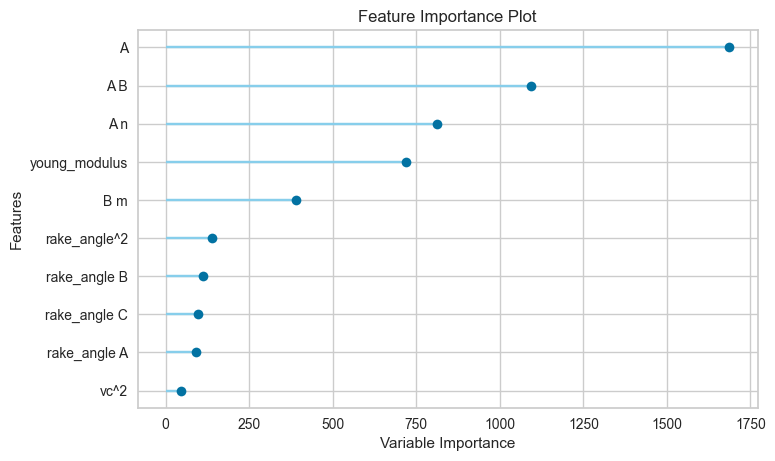

In [12]:
setup_2.plot_model(lasso,"feature")

In [13]:
lasso.feature_names_in_

array(['A', 'young_modulus', 'vc^2', 'rake_angle^2', 'rake_angle A',
       'rake_angle B', 'rake_angle C', 'rake_angle n', 'rake_angle m',
       'A B', 'A n', 'B m', 'B young_modulus'], dtype=object)

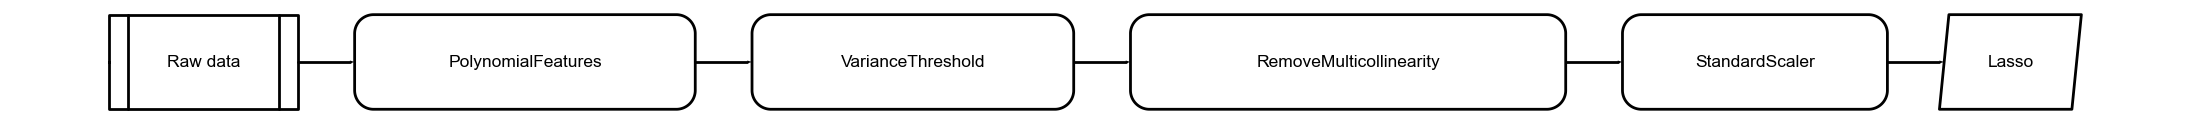

In [14]:
setup_2.plot_model(lasso,"pipeline")

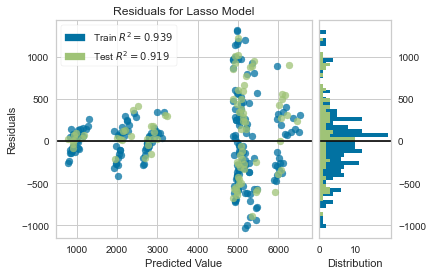

In [15]:
setup_2.plot_model(lasso, plot='residuals')

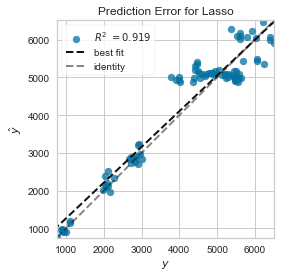

In [16]:
setup_2.plot_model(lasso, plot='error')

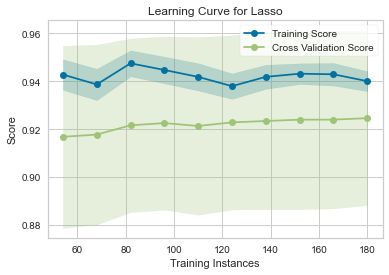

In [17]:
setup_2.plot_model(lasso, plot='learning')

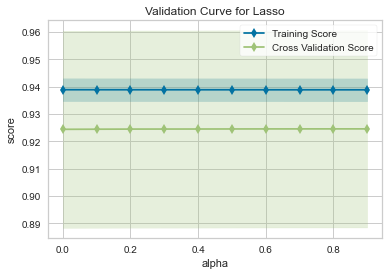

In [18]:
setup_2.plot_model(lasso, plot='vc')

In [19]:
setup_2.tune_model(lasso)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Lasso(random_state=6877)

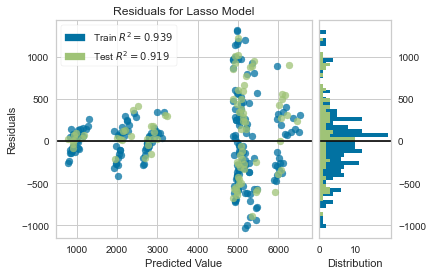

In [20]:
setup_2.plot_model(lasso,"residuals")

In [21]:
setup_2.plot_model(lasso,"parameter")

,Parameters
alpha,1.0
copy_X,True
fit_intercept,True
max_iter,1000
positive,False
precompute,False
random_state,6877
selection,cyclic
tol,0.0001
warm_start,False


In [22]:
setup_2.save_model(lasso,"models/lasso_v0",verbose=True)

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\99823827\AppData\Local\Temp\joblib),
          steps=[('polynomial_features',
                  TransformerWrapper(transformer=PolynomialFeatures(include_bias=False))),
                 ('low_variance',
                  TransformerWrapper(exclude=[],
                                     transformer=VarianceThreshold(threshold=0.01))),
                 ('remove_multicollinearity',
                  TransformerWrapper(exclude=[],
                                     transformer=RemoveMulticollinearity(threshold=0.9))),
                 ('normalize', TransformerWrapper(transformer=StandardScaler())),
                 ('trained_model', Lasso(random_state=6877))]),
 'models/lasso_v0.pkl')

In [23]:
setup_2.pipeline

Pipeline(memory=FastMemory(location=C:\Users\99823827\AppData\Local\Temp\joblib),
         steps=[('polynomial_features',
                 TransformerWrapper(transformer=PolynomialFeatures(include_bias=False))),
                ('low_variance',
                 TransformerWrapper(exclude=[],
                                    transformer=VarianceThreshold(threshold=0.01))),
                ('remove_multicollinearity',
                 TransformerWrapper(exclude=[],
                                    transformer=RemoveMulticollinearity(threshold=0.9))),
                ('normalize',
                 TransformerWrapper(transformer=StandardScaler()))])

In [24]:
setup_2.pipeline.transform(setup_2.train)

,A,young_modulus,expected_cut_force,vc^2,rake_angle^2,rake_angle A,rake_angle B,rake_angle C,rake_angle n,rake_angle m,A B,A n,B m,B young_modulus
0,-1.165285,-0.382176,1957.827026,-0.559953,-0.198329,-0.730033,-1.778420,-2.532963,-1.427382,-0.860025,0.340641,-0.141001,1.727452,1.703809
1,0.117113,-0.157564,5182.463379,1.359886,2.271127,1.584480,1.734437,0.784052,0.706881,1.061517,0.509696,-0.464280,0.341846,0.311901
2,0.117113,-0.157564,5977.834961,0.339972,0.658421,-1.514613,-1.550312,-0.790257,-0.824683,-1.134531,0.509696,-0.464280,0.341846,0.311901
3,-1.677189,-1.056013,1075.054321,0.339972,0.053657,0.174570,-0.084949,0.081095,0.555252,0.373422,-1.975809,-0.719780,-1.587853,-1.618022
4,-1.165285,-0.382176,2439.464844,-0.559953,-0.954284,-0.078551,0.274548,0.551038,0.167998,-0.036507,0.340641,-0.141001,1.727452,1.703809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,0.117113,-0.157564,4818.066895,1.359886,-0.954284,0.034933,0.092062,-0.003103,-0.058901,-0.036507,0.509696,-0.464280,0.341846,0.311901
197,-1.677189,-1.056013,1055.538452,-1.339888,2.271127,0.472991,-0.012411,0.242638,1.111590,0.818121,-1.975809,-0.719780,-1.587853,-1.618022
198,1.378401,-0.382176,6416.551758,0.339972,-0.601505,0.701360,0.400008,0.208372,1.217948,-0.100558,1.068974,2.613266,-1.277235,-0.013604
199,1.378401,-0.382176,6457.176758,1.359886,-0.752696,-0.963072,-0.647006,-0.408429,-1.310115,-0.314673,1.068974,2.613266,-1.277235,-0.013604


In [25]:
lasso.feature_names_in_

array(['A', 'young_modulus', 'vc^2', 'rake_angle^2', 'rake_angle A',
       'rake_angle B', 'rake_angle C', 'rake_angle n', 'rake_angle m',
       'A B', 'A n', 'B m', 'B young_modulus'], dtype=object)

##### Investigação do p-valor dos coeficientes do LASSO

In [26]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler 
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import set_config

set_config(transform_output="pandas")

pipeline=Pipeline([("poly",PolynomialFeatures(include_bias=False)),
                   ("variance",VarianceThreshold(threshold=0.01)),
                   ("scaler",StandardScaler())])
model=Lasso(random_state=4292)

train_X=pd.DataFrame(pipeline.fit_transform(setup_2.train.drop("expected_cut_force",axis=1)),
                   columns=pipeline["scaler"].get_feature_names_out())[lasso.feature_names_in_]
train_y=setup_2.train[["expected_cut_force"]]

test_X=pd.DataFrame(pipeline.transform(setup_2.test.drop("expected_cut_force",axis=1)),
                  columns=pipeline["scaler"].get_feature_names_out())[lasso.feature_names_in_]
test_y=setup_2.test[["expected_cut_force"]]

model.fit(train_X,train_y)

print(f"mean_absolute_error : {mean_absolute_error(test_y,model.predict(test_X))}")
print(f"mean_squared_error : {mean_squared_error(test_y,model.predict(test_X))}")
print(f"r2_score : {r2_score(test_y,model.predict(test_X))}")

mean_absolute_error : 369.9976806640625
mean_squared_error : 221277.21875
r2_score : 0.9194740699697108


In [27]:
import statsmodels.api as sm
 
# adding the constant term
x = pd.DataFrame(sm.add_constant(train_X),columns=["const"]+list(train_X.columns))
 
# performing the regression
# and fitting the model
#result = sm.OLS(train_y, x).fit_regularized(alpha=1,L1_wt=1)
model = sm.OLS(train_y, x)
result=model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     expected_cut_force   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     263.3
Date:                Sat, 12 Aug 2023   Prob (F-statistic):          3.12e-108
Time:                        14:28:07   Log-Likelihood:                -1509.7
No. Observations:                 201   AIC:                             3043.
Df Residuals:                     189   BIC:                             3083.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3980.8883     32.181    123.704      0.000    3917.409    4044.368
A                1298.0182     31.056     41.796      0.000    1236.757    1359.279
young_modulus    -448.7396     27.832    -16.123      0.000    -503.641    -393.838
vc^2              -47.7000     32.488     -1.468      0.144    -111.786      16.386
rake_angle^2      140.5314     36.852      3.813      0.000      67.837     213.226
rake_angle A       81.6395    835.024      0.098      0.922   -1565.524    1728.803
rake_angle B     -264.6733    674.990     -0.392      0.695   -1596.154    1066.808
rake_angle C      220.7901    554.383      0.398      0.691    -872.783    1314.363
rake_angle n      -76.6646    372.688     -0.206      0.837    -811.827     658.498
rake_angle m      -64.4947    330.443     -0.195      0.845    -716.325     587.336
A B              1495.3411     33.332     44.862      0.000    1429.591    1561.091
A n              -766.8024     46.395    -16.528      0.000    -858.320    -675.285
B m              -459.5385     23.417    -19.624      0.000    -505.730    -413.347
B young_modulus  -218.0025     20.985    -10.388      0.000    -259.398    -176.607
==============================================================================
Omnibus:                       15.415   Durbin-Watson:                   2.227
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.336
Skew:                          -0.605   Prob(JB):                     0.000172
Kurtosis:                       3.779   Cond. No.                     7.79e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.34e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [28]:
import numpy as np
frames = []
#model = sm.OLS(train_y, x)
for n in np.arange(0, 1, 0.05).tolist():
    results_fr = model.fit_regularized(alpha=n,L1_wt=1, start_params=result.params)

    results_fr_fit = sm.regression.linear_model.OLSResults(model, 
                                                           results_fr.params, 
                                                           model.normalized_cov_params
                                                        )
    frames.append(np.append(results_fr.params, results_fr_fit.ssr))

    df = pd.DataFrame(frames, columns=list(x.columns) + ['ssr*'])
df.index=np.arange(0, 1, 0.05).tolist()
df.index.name = 'alpha*'
df.T

alpha*,0.00,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95
const,3.980888e+03,3.980838e+03,3.980788e+03,3.980738e+03,3.980688e+03,3.980638e+03,3.980588e+03,3.980538e+03,3.980488e+03,3.980438e+03,3.980388e+03,3.980338e+03,3.980288e+03,3.980238e+03,3.980188e+03,3.980138e+03,3.980088e+03,3.980038e+03,3.979988e+03,3.979938e+03
A,1.298018e+03,1.297613e+03,1.297208e+03,1.296803e+03,1.296398e+03,1.295993e+03,1.295588e+03,1.295182e+03,1.294777e+03,1.294372e+03,1.293967e+03,1.293562e+03,1.293157e+03,1.292752e+03,1.292124e+03,1.291603e+03,1.291245e+03,1.290662e+03,1.290208e+03,1.289760e+03
young_modulus,-4.487396e+02,-4.481556e+02,-4.475717e+02,-4.469878e+02,-4.464039e+02,-4.458200e+02,-4.452361e+02,-4.446521e+02,-4.440682e+02,-4.434843e+02,-4.429004e+02,-4.423165e+02,-4.417326e+02,-4.411487e+02,-4.405856e+02,-4.399749e+02,-4.393847e+02,-4.388073e+02,-4.382369e+02,-4.376699e+02
vc^2,-4.770005e+01,-4.763683e+01,-4.757361e+01,-4.751040e+01,-4.744718e+01,-4.738396e+01,-4.732074e+01,-4.725753e+01,-4.719431e+01,-4.713109e+01,-4.706788e+01,-4.700466e+01,-4.694144e+01,-4.687822e+01,-4.678654e+01,-4.676697e+01,-4.672831e+01,-4.669418e+01,-4.664792e+01,-4.659922e+01
rake_angle^2,1.405314e+02,1.403978e+02,1.402642e+02,1.401307e+02,1.399971e+02,1.398636e+02,1.397300e+02,1.395965e+02,1.394629e+02,1.393294e+02,1.391958e+02,1.390622e+02,1.389287e+02,1.387951e+02,1.387367e+02,1.385562e+02,1.383924e+02,1.382727e+02,1.381529e+02,1.380386e+02
rake_angle A,8.163945e+01,7.524567e+01,6.885189e+01,6.245812e+01,5.606434e+01,4.967056e+01,4.327678e+01,3.688300e+01,3.048922e+01,2.409544e+01,1.770166e+01,1.130788e+01,4.914101e+00,-1.796786e-01,0.000000e+00,0.000000e+00,-5.684019e+00,0.000000e+00,0.000000e+00,0.000000e+00
rake_angle B,-2.646733e+02,-2.593252e+02,-2.539772e+02,-2.486291e+02,-2.432811e+02,-2.379330e+02,-2.325849e+02,-2.272369e+02,-2.218888e+02,-2.165408e+02,-2.111927e+02,-2.058447e+02,-2.004966e+02,-1.961859e+02,-1.944124e+02,-1.928589e+02,-1.883569e+02,-1.910636e+02,-1.904126e+02,-1.898217e+02
rake_angle C,2.207901e+02,2.163257e+02,2.118613e+02,2.073968e+02,2.029324e+02,1.984680e+02,1.940036e+02,1.895391e+02,1.850747e+02,1.806103e+02,1.761459e+02,1.716814e+02,1.672170e+02,1.629881e+02,1.610375e+02,1.599468e+02,1.565963e+02,1.585036e+02,1.579092e+02,1.573467e+02
rake_angle n,-7.666462e+01,-7.372491e+01,-7.078520e+01,-6.784549e+01,-6.490579e+01,-6.196608e+01,-5.902637e+01,-5.608666e+01,-5.314695e+01,-5.020724e+01,-4.726754e+01,-4.432783e+01,-4.138812e+01,-3.889436e+01,-3.918056e+01,-3.938643e+01,-3.675595e+01,-3.943735e+01,-3.940460e+01,-3.935906e+01
rake_angle m,-6.449466e+01,-6.199929e+01,-5.950391e+01,-5.700853e+01,-5.451315e+01,-5.201777e+01,-4.952239e+01,-4.702701e+01,-4.453163e+01,-4.203625e+01,-3.954088e+01,-3.704550e+01,-3.455012e+01,-3.237757e+01,-3.246794e+01,-3.269336e+01,-3.059470e+01,-3.292223e+01,-3.298474e+01,-3.303429e+01


In [29]:
results_fr = model.fit_regularized(L1_wt=1, alpha=1, start_params=result.params)
final = sm.regression.linear_model.OLSResults(model, 
                                              results_fr.params, 
                                              model.normalized_cov_params
                                              )

final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     expected_cut_force   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     263.2
Date:                Sat, 12 Aug 2023   Prob (F-statistic):          3.20e-108
Time:                        14:28:18   Log-Likelihood:                -1509.8
No. Observations:                 201   AIC:                             3044.
Df Residuals:                     189   BIC:                             3083.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3979.8883     32.185    123.656      0.000    3916.400    4043.377
A                1289.5279     31.060     41.517      0.000    1228.258    1350.797
young_modulus    -437.0973     27.836    -15.703      0.000    -492.007    -382.188
vc^2              -46.5137     32.493     -1.432      0.154    -110.609      17.582
rake_angle^2      137.9110     36.857      3.742      0.000      65.206     210.616
rake_angle A      -14.5348    835.141     -0.017      0.986   -1661.930    1632.861
rake_angle B     -179.5889    675.084     -0.266      0.791   -1511.257    1152.079
rake_angle C      149.1112    554.461      0.269      0.788    -944.615    1242.838
rake_angle n      -32.5262    372.740     -0.087      0.931    -767.792     702.740
rake_angle m      -27.2616    330.490     -0.082      0.934    -679.184     624.661
A B              1492.4912     33.337     44.770      0.000    1426.732    1558.251
A n              -764.7052     46.401    -16.480      0.000    -856.236    -673.174
B m              -471.2945     23.420    -20.124      0.000    -517.492    -425.097
B young_modulus  -201.9469     20.988     -9.622      0.000    -243.348    -160.546
==============================================================================
Omnibus:                       14.619   Durbin-Watson:                   2.231
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.370
Skew:                          -0.580   Prob(JB):                     0.000279
Kurtosis:                       3.779   Cond. No.                     7.79e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.34e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Excluindo mais variáveis dado a informação de relevância do p-valor

In [30]:
import statsmodels.api as sm
 
# adding the constant term
x = pd.DataFrame(sm.add_constant(train_X),columns=["const"]+list(train_X.columns))[[
    "A",
    "young_modulus",
    "rake_angle^2",
    "A B",
    "A n",
    "B m",
    "B young_modulus"
]]
 
# performing the regression
# and fitting the model
#result = sm.OLS(train_y, x).fit_regularized(alpha=1,L1_wt=1)
model = sm.OLS(train_y, x)
result=model.fit()

In [31]:
results_fr = model.fit_regularized(L1_wt=1, alpha=1, start_params=result.params)
final = sm.regression.linear_model.OLSResults(model, 
                                              results_fr.params, 
                                              model.normalized_cov_params
                                              )

final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     expected_cut_force   R-squared (uncentered):                  -2.377
Model:                            OLS   Adj. R-squared (uncentered):             -2.463
Method:                 Least Squares   F-statistic:                             -27.59
Date:                Sat, 12 Aug 2023   Prob (F-statistic):                        1.00
Time:                        14:28:19   Log-Likelihood:                         -2092.1
No. Observations:                 201   AIC:                                      4194.
Df Residuals:                     196   BIC:                                      4211.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
A               -8.537e+10   1.23e+10     -6.950      0.000    -1.1e+11   -6.11e+10
young_modulus    7.015e+10   1.01e+10      6.950      0.000    5.02e+10    9.01e+10
rake_angle^2      175.1019    574.214      0.305      0.761    -957.328    1307.532
A B               8.12e+10   1.17e+10      6.950      0.000    5.82e+10    1.04e+11
A n              2.119e+09   3.05e+08      6.950      0.000    1.52e+09    2.72e+09
B m             -4.064e+10   5.85e+09     -6.950      0.000   -5.22e+10   -2.91e+10
B young_modulus -1.751e+10   2.52e+09     -6.950      0.000   -2.25e+10   -1.25e+10
==============================================================================
Omnibus:                       43.059   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.626
Skew:                          -1.003   Prob(JB):                     2.48e-09
Kurtosis:                       2.157   Cond. No.                     1.94e+15
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 1.31e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Investigando LightGBM

In [32]:
lgbm=create_model("lightgbm")

In [21]:
pull()

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,309.3985,232091.7256,481.7590,0.9662,0.1054,0.0733
1,201.7328,90280.4732,300.4671,0.9880,0.0858,0.0610
2,211.1293,125350.9245,354.0493,0.9597,0.0990,0.0666
3,117.7249,19897.3678,141.0580,0.9976,0.0681,0.0520
4,156.8573,58219.1591,241.2865,0.9905,0.0719,0.0423
5,467.8523,497311.9859,705.2035,0.9302,0.1161,0.0883
6,309.4762,233412.0289,483.1273,0.9565,0.1046,0.0702
7,364.6082,278175.5707,527.4235,0.9277,0.1064,0.0784
8,357.6617,292014.4865,540.3836,0.9389,0.1160,0.0878


In [24]:
lgbm

LGBMRegressor(random_state=4540)

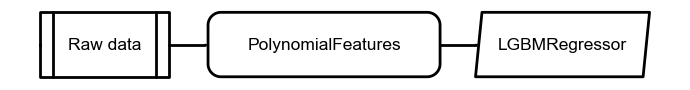

In [25]:
plot_model(lgbm, "pipeline")

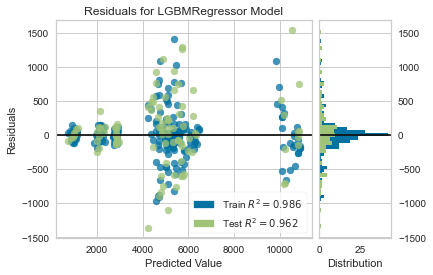

In [26]:
plot_model(lgbm, plot='residuals')

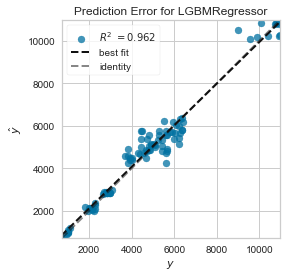

In [27]:
plot_model(lgbm, plot='error')

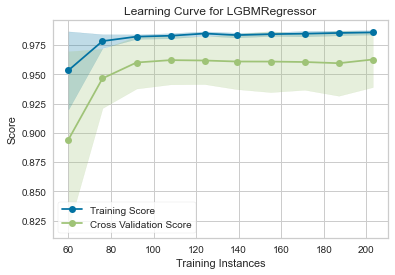

In [28]:
plot_model(lgbm, plot='learning')

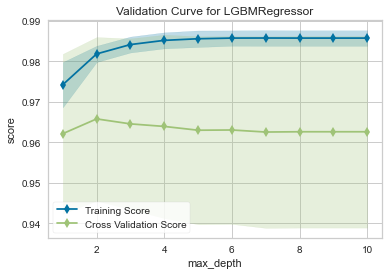

In [29]:
plot_model(lgbm, plot='vc')

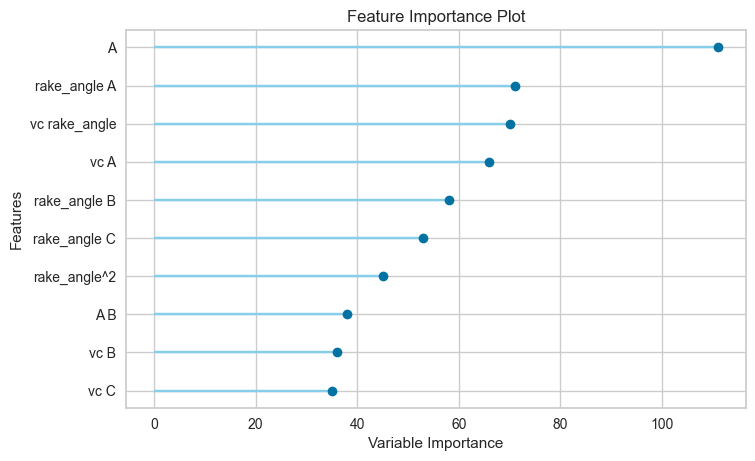

In [30]:
plot_model(lgbm, plot='feature')

In [20]:
save_model(lgbm,"models/lgbm_v0",verbose=True)

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\99823827\AppData\Local\Temp\joblib),
          steps=[('polynomial_features',
                  TransformerWrapper(transformer=PolynomialFeatures(include_bias=False))),
                 ('trained_model', LGBMRegressor(random_state=4949))]),
 'models/lgbm_v0.pkl')

# Modelagem sem polynomial features

,Description,Value
0,Session id,1831
1,Target,expected_cut_force
2,Target type,Regression
3,Original data shape,"(324, 12)"
4,Transformed data shape,"(324, 12)"
5,Transformed train set shape,"(226, 12)"
6,Transformed test set shape,"(98, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,None


In [23]:
best = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,16:53:47
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Linear Regression


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,345.5288,233758.6752,477.7977,0.9578,0.1014,0.0785,0.0330
gbr,Gradient Boosting Regressor,355.1062,256031.3986,497.6145,0.9542,0.0986,0.0766,0.0370
knn,K Neighbors Regressor,358.5508,249965.3266,494.9110,0.9540,0.1015,0.0782,0.0140
catboost,CatBoost Regressor,359.7647,281506.1228,521.5496,0.9508,0.1045,0.0781,0.1510
llar,Lasso Least Angle Regression,383.8108,267076.2375,507.3246,0.9497,0.1094,0.0874,0.0120
lr,Linear Regression,383.7722,266980.1328,507.1040,0.9496,0.1092,0.0873,0.0470
lasso,Lasso Regression,385.0282,267595.6594,508.0514,0.9496,0.1111,0.0888,0.4040
rf,Random Forest Regressor,345.4601,279497.0385,520.2474,0.9496,0.1012,0.0733,0.0320
xgboost,Extreme Gradient Boosting,374.4546,316721.3094,550.4610,0.9447,0.1088,0.0797,0.1960
et,Extra Trees Regressor,372.6379,320550.2556,553.3668,0.9436,0.1071,0.0780,0.0300


## Investigando Lasso

In [24]:
lasso=create_model("lasso")
lasso

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,16:55:26
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Lasso Regression


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,307.1633,198336.4844,445.3499,0.9585,0.0934,0.0692
1,386.8020,250652.5625,500.6521,0.9671,0.0869,0.0733
2,362.7656,244445.5625,494.4144,0.9566,0.0904,0.0648
3,293.5306,157825.7969,397.2729,0.9685,0.1005,0.0773
4,443.0511,349961.6875,591.5756,0.9625,0.1180,0.0987
5,380.0340,288097.6250,536.7473,0.9397,0.1246,0.0977
6,557.7722,535782.8125,731.9719,0.8273,0.1415,0.1164
7,307.1191,148188.7656,384.9529,0.9766,0.0925,0.0805
8,434.5976,301634.8438,549.2130,0.9622,0.1078,0.0866


Lasso(random_state=1831)

In [25]:
for feature_name, weight in zip(lasso.feature_names_in_,lasso.coef_):
    if weight >0.0001:
        print("{} : {:.4f}".format(feature_name.replace(" ","*"),weight))

A : 22.0549
B : 3.1327
m : 6569.6982


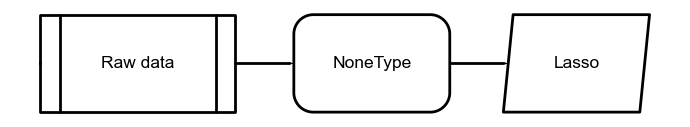

In [26]:
plot_model(lasso,"pipeline")

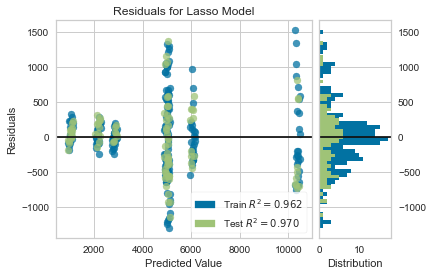

In [27]:
plot_model(lasso, plot='residuals')

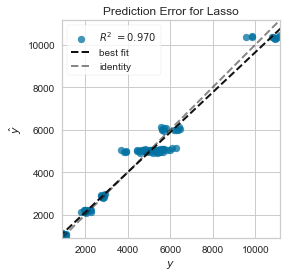

In [28]:
plot_model(lasso, plot='error')

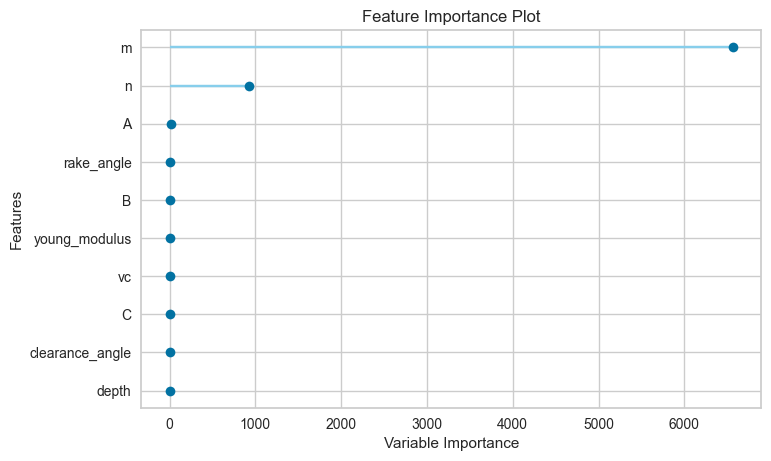

In [29]:
plot_model(lasso, plot='feature')

In [30]:
save_model(lasso,"models/lasso_v1",verbose=True)

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\99823827\AppData\Local\Temp\joblib),
          steps=[('placeholder', None),
                 ('trained_model', Lasso(random_state=1831))]),
 'models/lasso_v1.pkl')

## Investigando LightGBM

In [31]:
lgbm=create_model("lightgbm")

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,17:02:03
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Light Gradient Boosting Machine


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,338.7084,230312.3188,479.9087,0.9518,0.1002,0.0743
1,389.0463,277467.3515,526.7517,0.9636,0.0813,0.0649
2,292.4834,151404.3744,389.1072,0.9731,0.0734,0.0548
3,260.2682,161608.6680,402.0058,0.9677,0.1021,0.0725
4,379.7824,287948.0220,536.6079,0.9692,0.1109,0.0871
5,335.3102,237481.4024,487.3206,0.9503,0.1075,0.0833
6,440.2531,351654.5610,593.0047,0.8866,0.1176,0.1000
7,303.1667,174971.8956,418.2964,0.9723,0.0852,0.0698
8,435.4070,322637.4953,568.0119,0.9595,0.1108,0.0862


In [32]:
lgbm

LGBMRegressor(random_state=1831)

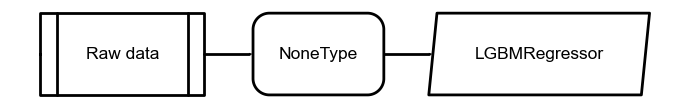

In [33]:
plot_model(lgbm, "pipeline")

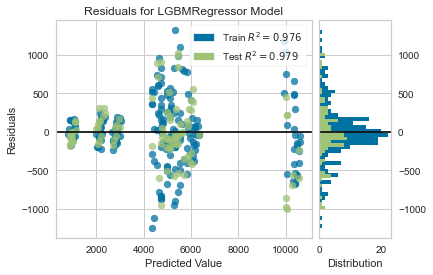

In [34]:
plot_model(lgbm, plot='residuals')

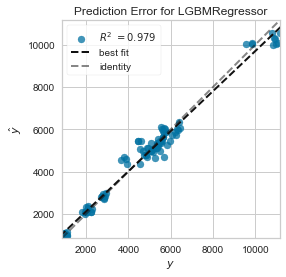

In [35]:
plot_model(lgbm, plot='error')

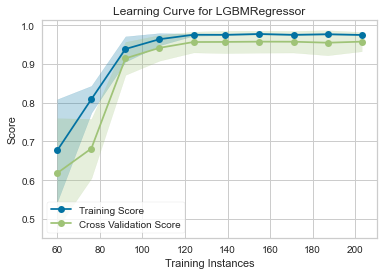

In [36]:
plot_model(lgbm, plot='learning')

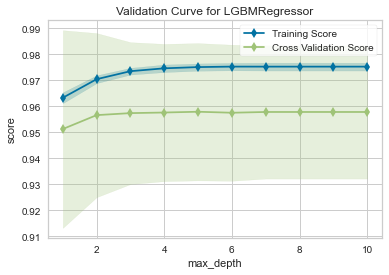

In [37]:
plot_model(lgbm, plot='vc')

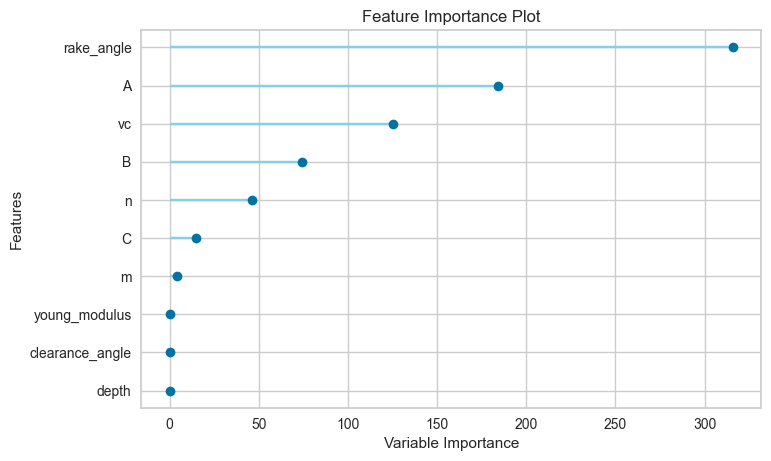

In [38]:
plot_model(lgbm, plot='feature')

In [39]:
save_model(lgbm,"models/lgbm_v1",verbose=True)

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\99823827\AppData\Local\Temp\joblib),
          steps=[('placeholder', None),
                 ('trained_model', LGBMRegressor(random_state=1831))]),
 'models/lgbm_v1.pkl')

# Modelagem com polynomial features mas filtrando variáveis do material

In [40]:
df_1.columns

Index(['depth', 'vc', 'rake_angle', 'clearance_angle', 'expected_cut_force',
       'A', 'B', 'C', 'n', 'm', 'young_modulus', 'poisson_coef'],
      dtype='object')

In [41]:
df_2=df_1.drop([ 'A', 'B', 'C', 'n', 'm',],axis=1)

,Description,Value
0,Session id,5343
1,Target,expected_cut_force
2,Target type,Regression
3,Original data shape,"(324, 7)"
4,Transformed data shape,"(324, 7)"
5,Transformed train set shape,"(226, 7)"
6,Transformed test set shape,"(98, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,None


In [51]:
best = compare_models()

## Investigando Lasso

In [53]:
lasso=create_model("lasso")
lasso

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,17:30:09
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Lasso Regression


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1485.0612,3735265.5000,1932.6835,0.4305,0.5501,0.5831
1,1573.9053,3968244.7500,1992.0454,0.0280,0.4681,0.4491
2,2352.0972,7559852.5000,2749.5186,0.2053,0.6107,0.6523
3,1710.3486,4341016.5000,2083.5105,0.3853,0.4182,0.3846
4,1649.2773,4021302.5000,2005.3186,-0.0539,0.5797,0.6216
5,1897.0509,6156286.0000,2481.1865,0.0462,0.5173,0.5322
6,2022.8251,6318448.0000,2513.6523,0.2874,0.4952,0.4891
7,1671.9696,4924861.5000,2219.2029,0.0484,0.4365,0.4188
8,1643.0476,4532926.0000,2129.0669,0.2030,0.4640,0.4274


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Lasso(random_state=5343)

In [54]:
for feature_name, weight in zip(lasso.feature_names_in_,lasso.coef_):
    if weight >0.0001:
        print("{} : {:.4f}".format(feature_name.replace(" ","*"),weight))

vc : 0.0017
young_modulus : 0.3368


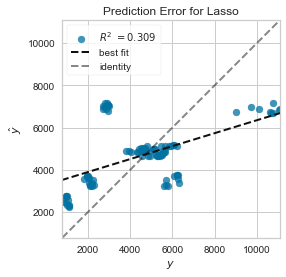

In [57]:
plot_model(lasso, plot='error')

## Investigando LightGBM

In [58]:
lgbm=create_model("lightgbm")

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,17:30:36
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Light Gradient Boosting Machine


In [59]:
lgbm

LGBMRegressor(random_state=5343)

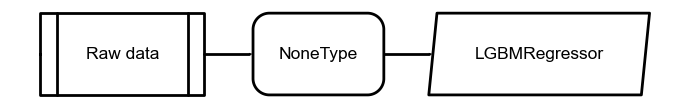

In [60]:
plot_model(lgbm, "pipeline")

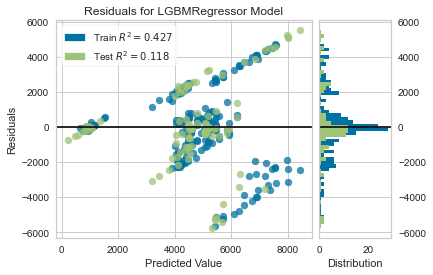

In [61]:
plot_model(lgbm, plot='residuals')

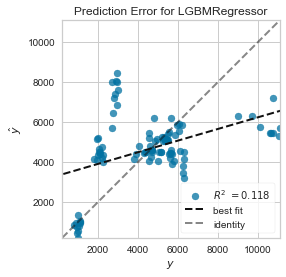

In [62]:
plot_model(lgbm, plot='error')